# Image filter and blur

圖像的平滑模糊與濾波  
其目的是為了讓圖像的噪點去除，增強圖像的效果  
在opencv中有一個函數cv2.filter2D作為2D影像的濾波操作工具  
其運算是卷積運算  

首先讀取圖片lena_noise
分別讀取兩張  
一張是灰階圖案  
一張彩色圖案

In [1]:
import cv2 as cv
import os

root = os.getcwd()
img_path = os.path.join(root,'Image/lena_noise.jpg')

img0 = cv.imread(img_path,0)
img1 = cv.imread(img_path)


方便輸出圖案觀察前後結果  
先創立一個簡單的畫圖函數

In [2]:
import matplotlib.pyplot as plt


def plot_piar_img(img0,img1,title):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1),plt.imshow(img0,cmap='gray'),plt.xticks([]),plt.yticks([])
    plt.title(title+'_gray')
    plt.subplot(1,2,2),plt.imshow(img1[:,:,::-1]),plt.xticks([]),plt.yticks([])
    plt.title(title+'_color')

## Filter2D

統一的濾波器，此函數需要輸入一個kernel然後會pixel by pixel從anchor point開始對kenel做卷積運算  
函數中需要輸入ddepth 此為 8U1C , 8U3C ... 影像的depth資訊  
如果輸入-1代表與原圖的一致

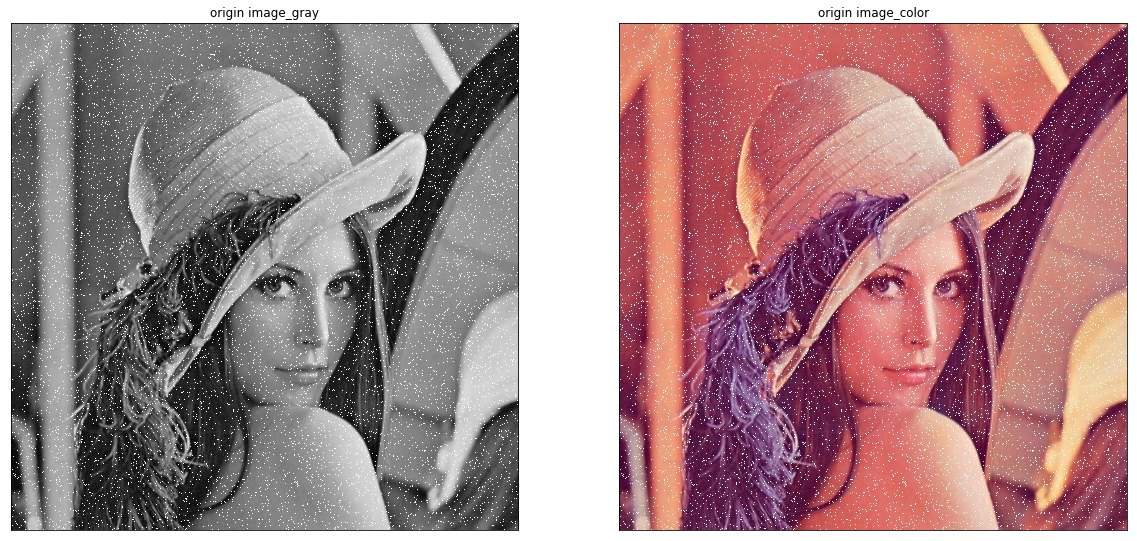

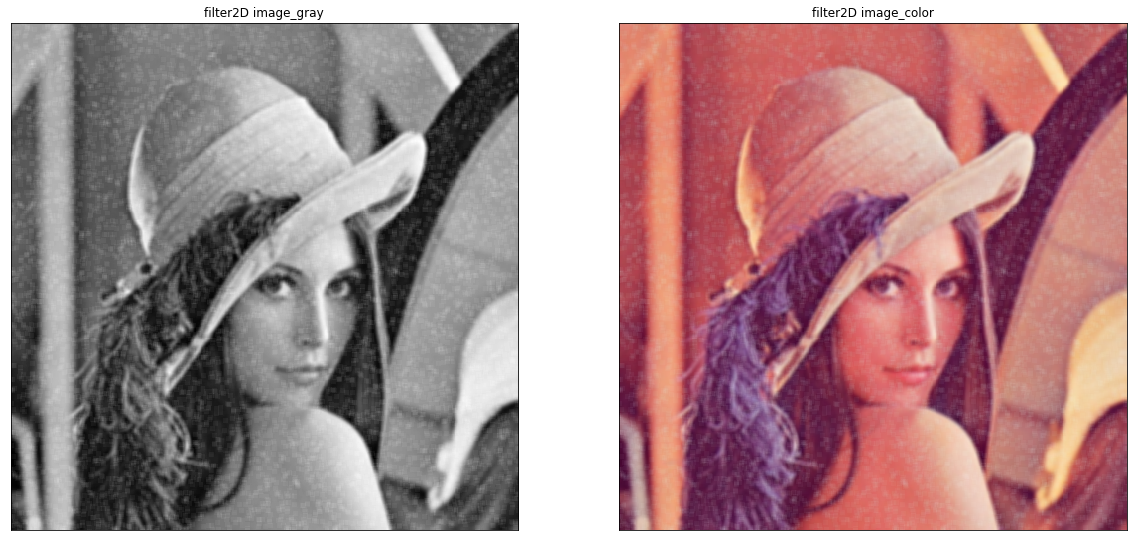

In [3]:
import numpy as np


kernel = np.ones((5,5),'float32')/25
dst0 = cv.filter2D(img0,-1,kernel)
dst1 = cv.filter2D(img1,-1,kernel)

plot_piar_img(img0,img1,'origin image')
plot_piar_img(dst0,dst1,'filter2D image')


上下對比結果
上面是原圖(灰階，彩色)  
下面是通過一個5x5的均值濾波所生成的結果

## Blur

這是opencv專門用來做均值濾波的function  
可以利用此函示，與定義的kernel size來做濾波

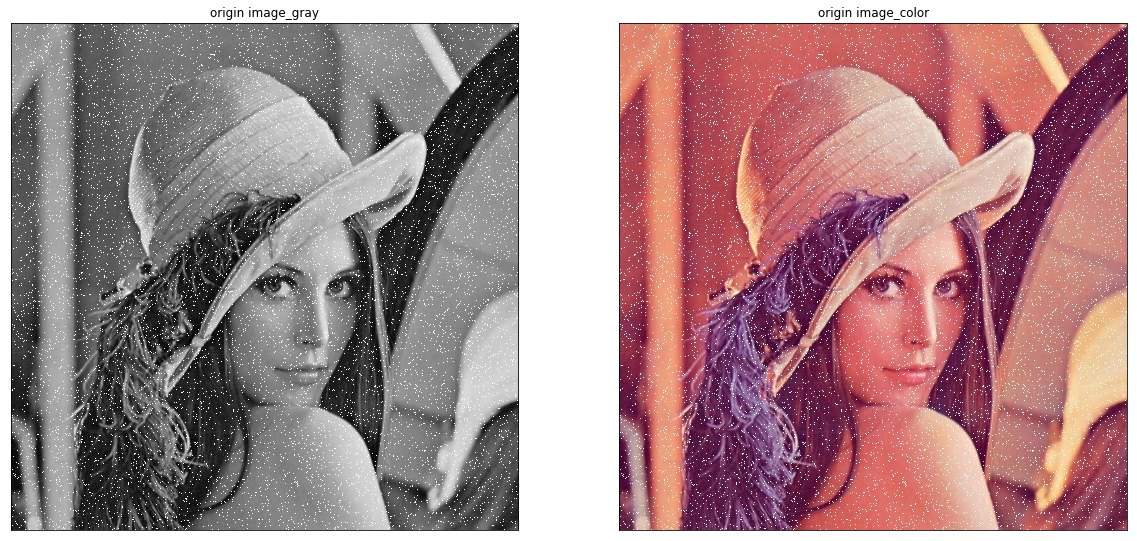

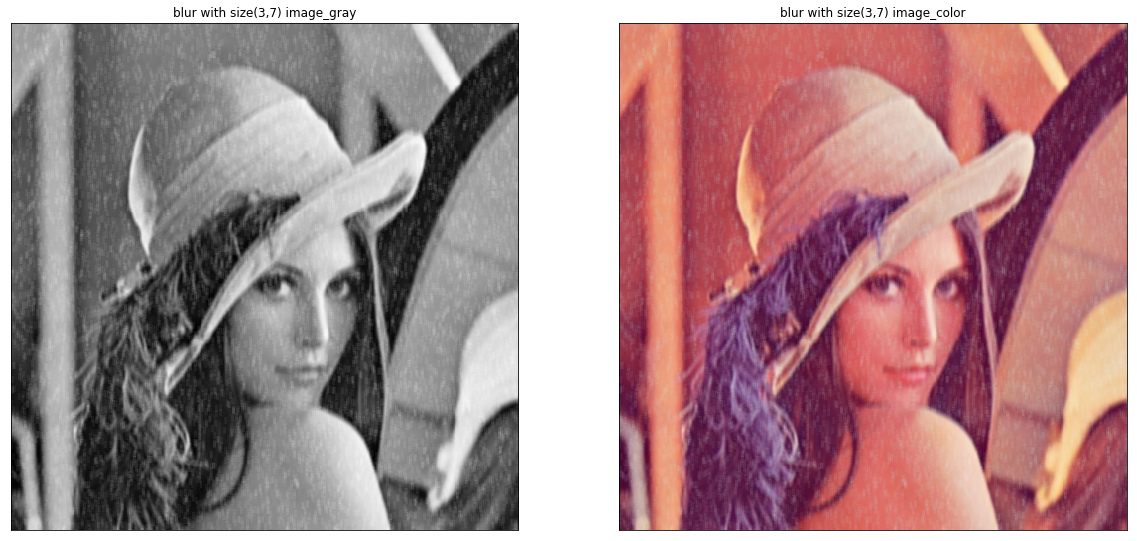

In [4]:
blur0 = cv.blur(img0,(3,7))
blur1 = cv.blur(img1,(3,7))

plot_piar_img(img0,img1,'origin image')
plot_piar_img(blur0,blur1,'blur with size(3,7) image')

## GaussianBlur

高斯濾波  
此濾波器所使用的kernel並非均值分布  
而是高斯分布  
可以定義kernel的size  
與高斯分布在X與Y方向的標準差  
如果只給X，則Y=X  
如果給0，則函式會自己算


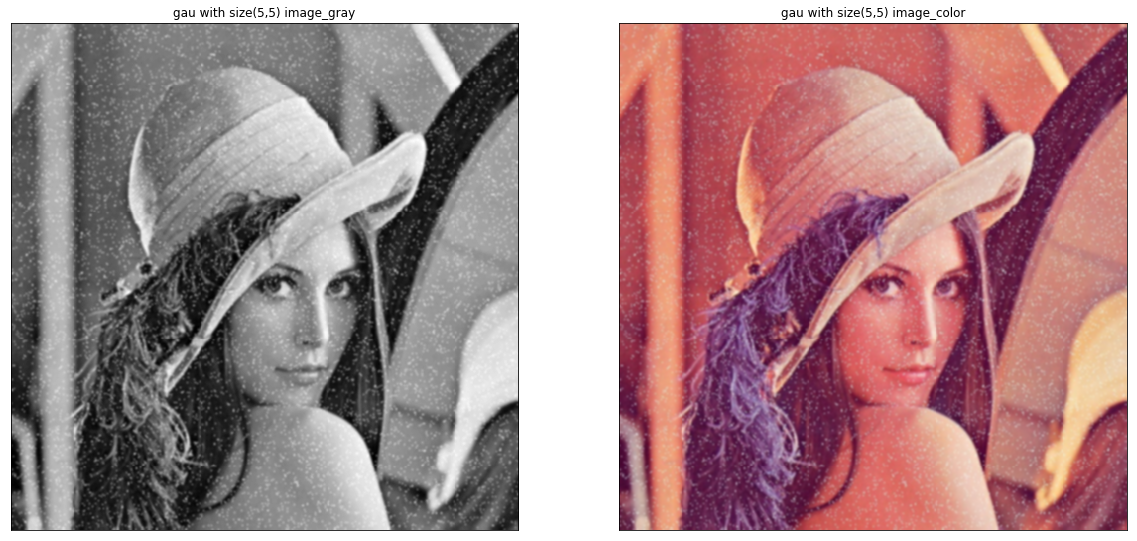

In [5]:
gau0 = cv.GaussianBlur(img0,(5,5),0)
gau1 = cv.GaussianBlur(img1,(5,5),0)

plot_piar_img(gau0,gau1,'gau with size(5,5) image')

## medianBlur

中值濾波  
定義好kernel size  
會計算anchor pixel周圍定義的size的中間值，做為pixel的值填上  
能有效濾除稀疏的噪點  
缺點是計算慢

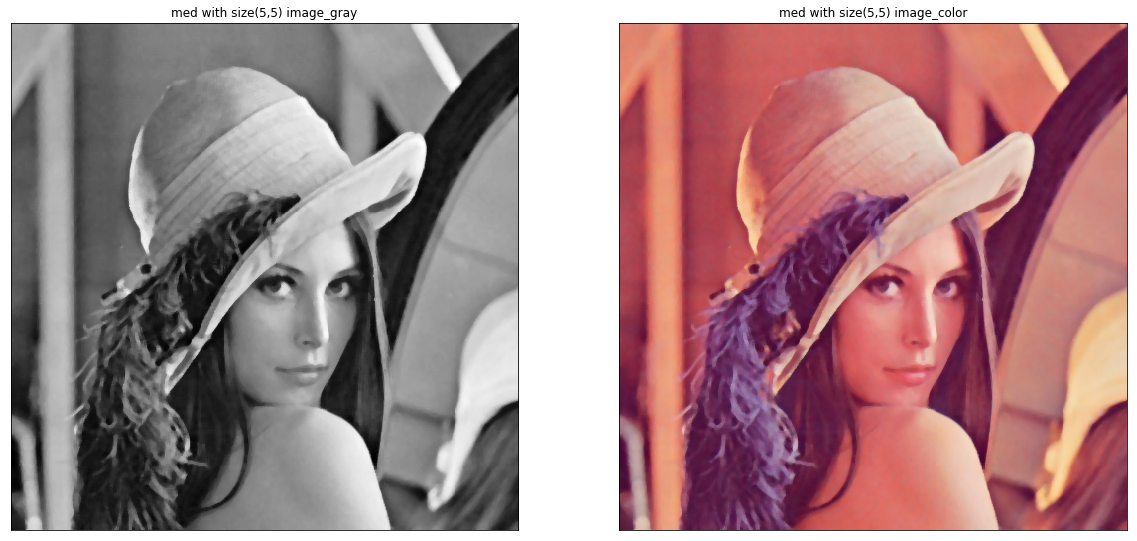

In [6]:
med0 = cv.medianBlur(img0,5)
med1 = cv.medianBlur(img1,5)

plot_piar_img(med0,med1,'med with size(5,5) image')

## bilateralFilter

雙邊濾波  
[詳細介紹](https://blog.csdn.net/abcjennifer/article/details/7616663)

cv2.bilateralFilter(img, a, b, c)  
函數需要輸入四組參數
函数有四个參數需要
* a: 計算的直徑範圍
* b: 高斯函數的標準差
* c: 灰階相似性高斯標準差

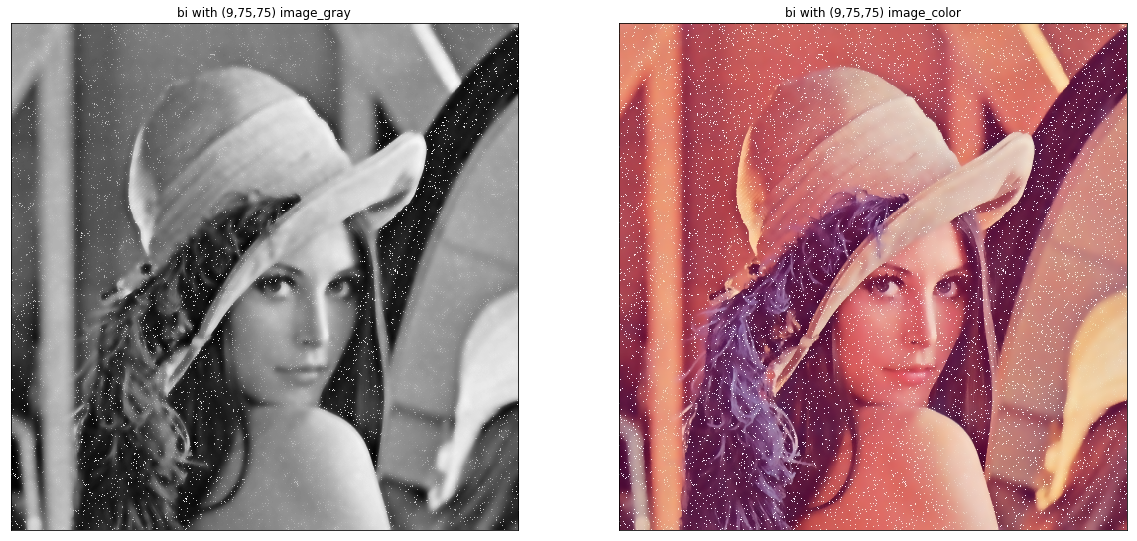

In [10]:
bi0 = cv.bilateralFilter(img0, 9,75,75)
bi1 = cv.bilateralFilter(img1, 9,75,75)
plot_piar_img(bi0,bi1,'bi with (9,75,75) image')